<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Alonso Uribe
- Nombre de alumno 2: Carolina Nuñez


### **Link de repositorio de GitHub:** [Repositorio💻](https://github.com/carinunez/Labs_MDS/)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado **crear un modelo capaz de predecir/clasificar diabetes** pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<!-- <p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p> -->

In [2]:
!pip install xgboost

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [3]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
# from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [4]:
# Inserte su código aquí
num_cols = df.select_dtypes('number').columns
# df[num_cols].hist(figsize=(12,12));

Múltiples variables tienen valores entre 0 y 1, por lo que a las variables que tienen un mayor rango de valores y una distribución similar a una Gaussiana (BMI y GenHith), se les aplicará StandardScaler. Mientras que las variables que no tienen una dist Gaussiana como Age, MentHith, PhysHith, se les aplicará MinMaxScaler. De esta manera, todas las variables numéricas tendrán el mismo rango de valores, mejorando el rendimiento del algoritmo.

In [5]:
X = df.drop(columns='Diabetes')
y = df['Diabetes'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=29)

In [6]:
# Column Transformer
col_transf = ColumnTransformer([
                                ('minMax', MinMaxScaler(), ['Age', 'MentHlth', 'PhysHlth']),
                                ('standar', StandardScaler(), ['BMI', 'GenHlth'])],
                                remainder="passthrough",
                                verbose_feature_names_out=False)
col_transf.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('minMax', MinMaxScaler(),
                                 ['Age', 'MentHlth', 'PhysHlth']),
                                ('standar', StandardScaler(),
                                 ['BMI', 'GenHlth'])],
                  verbose_feature_names_out=False)

Cree un pipeline donde integre el preprocesamiento y el modelo XGBoost y entrene el modelo. Luego utilice classification_report(..) para reportar el desempeño del modelo. (1 punto)


In [7]:
xgb_pipe = Pipeline([
                    ('col_transformation', col_transf),
                    ('xgb', XGBClassifier(random_state=29))])

In [8]:
xgb_pipe.fit(X_train, y_train)
y_pred = xgb_pipe.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.73     11674
         1.0       0.73      0.78      0.75     11655

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.74     23329
weighted avg       0.75      0.75      0.74     23329



1. Teniendo en cuenta que son más "dañinos" los Falsos Negativos que los Falsos Positivos para la clase 0, pues una persona con la enfermedad podría ser diagnosticada como sana, entonces hay que enfocarse en el valor del precision y en el recall para la otra clase. Teniendo eso en cuenta, este modelo permite predecir con al menos el 77% de efectivadad.
2. Las métricas permiten explicar:
    - **precision:** proporción de true positive/(todas las muestras predichas como positivas). Por lo que mientras mayor sea este, menor será la cantidad de falsos positivos.
    - **Recall:** proporción de true positive/(todas las muestras que realmente son positivas). Por lo que mientras mayor sea este, menor será la cantidad de falsos negativos.
    - **F1 score:** es un promedio entre las 2 métricas anteriores.
    - **Accuracy:** proporción de las muestras bien predichas (ambas clases) respecto al total.

3. Para asegurar que las variables seleccionadas sean las ideales para predecir, se puede revisar el rendimiento del modelo, usando Precision, Recall, F1score. Además, se podría revisar la importancia de las variables para comprobar que estas permiten predecir la variable de interés.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

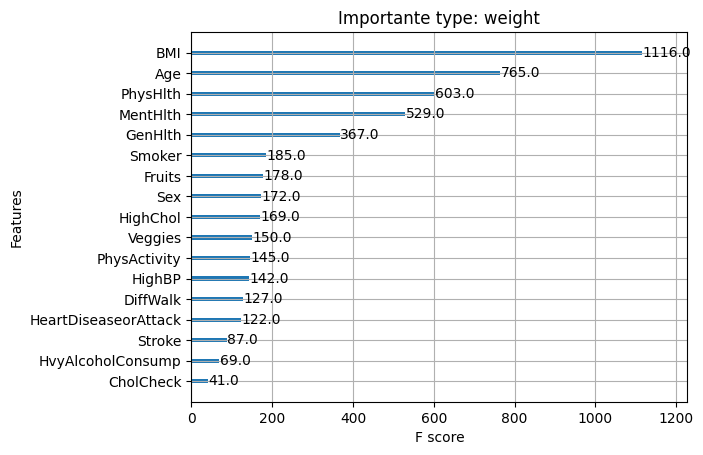

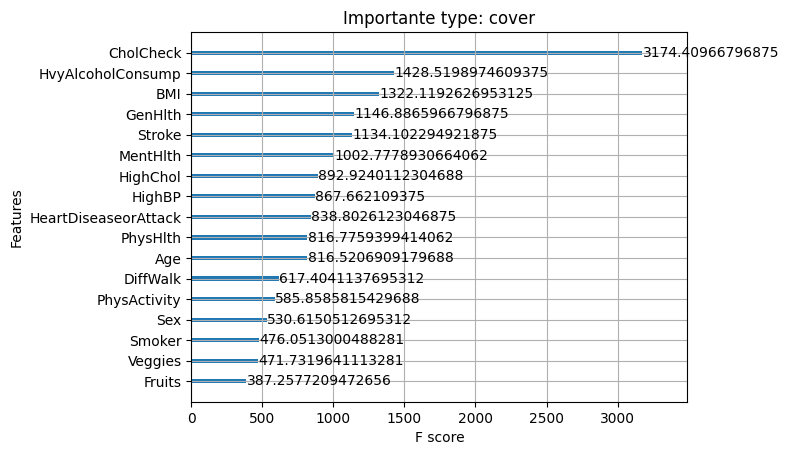

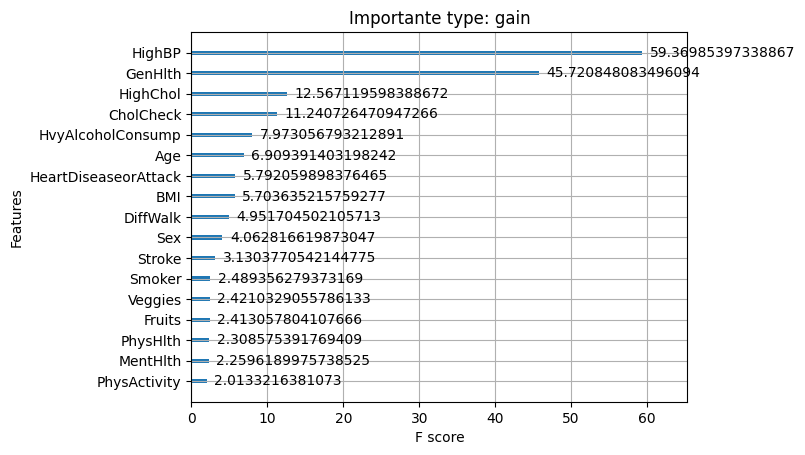

In [10]:
import xgboost as xgb
xgb_step = xgb_pipe.named_steps['xgb']

imp_types = ['weight', 'cover', 'gain']
for importance in imp_types:
  xgb.plot_importance(xgb_step, importance_type=importance,
                      title=f'Importante type: {str(importance)}')


2. Los resultados no son comparables ya que atribuyen la importancia de distinta forma, por lo que el orden de importancia no es el mismo entre los distintos tipos. Esta diferencia se debe a que:

*   Weight: ordena según la cantidad de veces que la variable aparece en el árbol.
*   Cover: ordena según la cantidad de muestras a las que afecta la división del árbol.
*   Gain: ordena según la ganancia promedio dada la división del árbol.

3. Las importancias por sí solas no permiten interpretar el modelo, pues necesitamos de conocer las relaciones entre variables, qué valores utiliza para hacer las divisiones, entre otros. Entonces, conocer las importancias permite tener una idea de los factores determinantes en el modelo, pero es necesaria más información para poder interpretar el modelo en su totalidad.

Una desventaja es que no podemos conocer la importancia aislada de las variables en el modelo, ya que este método calcula la importancia apartir de métricas comparativas.

## 4. Métodos Agnósticos Globales (10 puntos)
<!--
<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p> -->

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [11]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [12]:
# Guardo el orden de las variables
features = xgb_step.get_booster().feature_names
p_importance = permutation_importance(xgb_step, X_test[features], y_test, random_state=29)

In [13]:
# 30 iteraciones
p_importance_30 = permutation_importance(xgb_step, X_test[features], y_test, n_repeats=30, random_state=29)
print('Desviaciones estandar: ', p_importance_30['importances_std'])

Desviaciones estandar:  [0.         0.00140246 0.00091079 0.         0.00065641 0.00111749
 0.00071251 0.00049287 0.00170373 0.00074823 0.0006827  0.00054656
 0.00107504 0.00042245 0.00069856 0.00034903 0.00129689]


In [14]:
np.array(features)

array(['Age', 'MentHlth', 'PhysHlth', 'BMI', 'GenHlth', 'Sex', 'HighChol',
       'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke',
       'HighBP'], dtype='<U20')

Las desviaciones estandar dan cuenta de la variación de importancia de las variables en las 30 iteraciones. Las variables como Age y BMI tienen desviación nula, por lo que se puede decir que su importancia no varia al iterar.

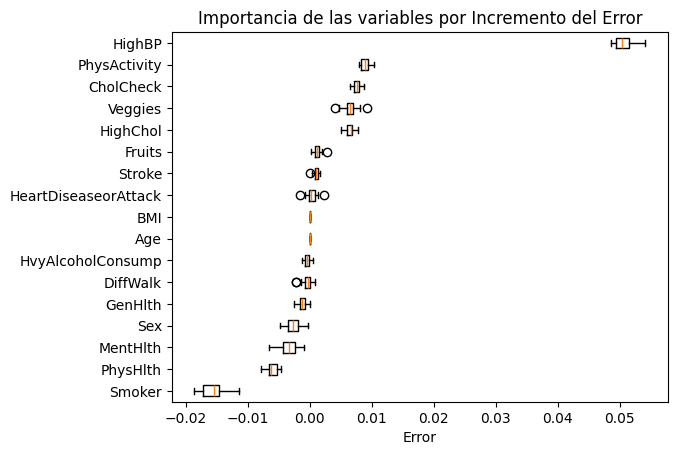

In [15]:
# Plot importancia de variables
perm_sorted_idx = p_importance_30.importances_mean.argsort()
plt.boxplot(
    p_importance_30.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(features)[perm_sorted_idx],
)
plt.title("Importancia de las variables por Incremento del Error")
plt.xlabel('Error')
plt.show()

**PREGUNTAS**
1. La importancia es medida como la diferencia entre una métrica de referencia y la métrica asociada a la permutación de las columnas.

2. Variables más importances: HighBP, PhysActivity, CholCheck, Veggies, HighCol.
Dado que estamos prediciendo diabetes, tiene sentido los factores más importantes tengan relación con aspectos que permiten determinar si una persona lleva una vida saludable o no, tales como presión alta, si hacen ejercicio o no, si llevan un chequeo del colesterol, si consumen vegetales y si tienen colesterol alto, pues todos estos factores

3. 3 de las 5 variables más importantes obtenidas mediante la permutación de variables coincide con el top5 variables más importantes obtenidas mediante el método 'gain' del apartado anterior. Sin embargo, el top 5 obtenido con la permutación de variables difiere con del obtenido con los otros métodos.

4.
 **Ventajas**:
  * _Permite interpretar a nivel global._
  * _No se necesita re-entrenar el modelo_, ya que no elimina variable sino que solo las permuta.
  * _Toma en cuenta las interacciones_, permutación puede afectar la interacción entre variables.

**Desventajas**
  * _Está relacionada con el error del modelo_.La permutación de variables podría afectar el rendimiento de un modelo.
  * _Se necesita acceso a los resultados reales_, por lo que este método no sería aplicable a dataset sin etiquetar.
  * _La presencia de variables correlacionadas podría generar sesgos_. Permutar las variables podría generar data poco realista, afectando el rendimiento del modelo.
  * _Agregar una variable correlacionada con otra podría disminuir la importancia de esta._

## 5. Métodos Agnósticos Locales (20 puntos)

<!-- <p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p> -->

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [16]:
!pip install shap

In [17]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [18]:
import shap

explainer = shap.TreeExplainer(xgb_step)
shap_values = explainer(X)

Las instancias de la variable shap_values tiene una correspondencia directa con las instancias del dataset, con la diferencia de que cada valor de las columnas encontrado en shap_values son los valores shap encontrados para cada feature (correspondiente a la columna) del modelo. Dicho de otra forma, una instancia en shap_values es un vector con el aporte de cada feature a lo predicho por el modelo (según Shap).

¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

Según lo explicado anteriormente, el signo de un shap-value es con respecto a lo que aporta a la posibilidad de diabetes, desde los **valores base** encontrados en modelo. Si es negativo, baja la posibilidad de diabetes con respecto a el valor base, y si es positivo, lo contrario.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

In [19]:
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X.iloc[idx,:],
                link="logit")

In [20]:
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X.iloc[idx,:],
                link="logit")

In [21]:
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X.iloc[idx,:],
                link="logit")

2.

a) Variables que afectan:

-   Positivamente encontradas en las tres instancias: BMI, CholCheck=1, menor edad, HearthDeseaseAttack=1, etc.

-   Negativamente encontradas en las tres instancias: PhisActivity=0, HeartDeseaseofAttack=0, HighCol=1, etc

b)
Sí, BMI siempre tiene un aporte positivo, y HeartDeseaseofAttack define en las tres instancias si el paciente posee diabetes o no, dependiendo si esta variable es True o False, respectivamente.

c)
Se podrían generalizar las conclusiones más destacables hasta ahora, pero puede ser muy pronto para concluir. Aún así es una buena primera directriz para explicar el fenómeno.



### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

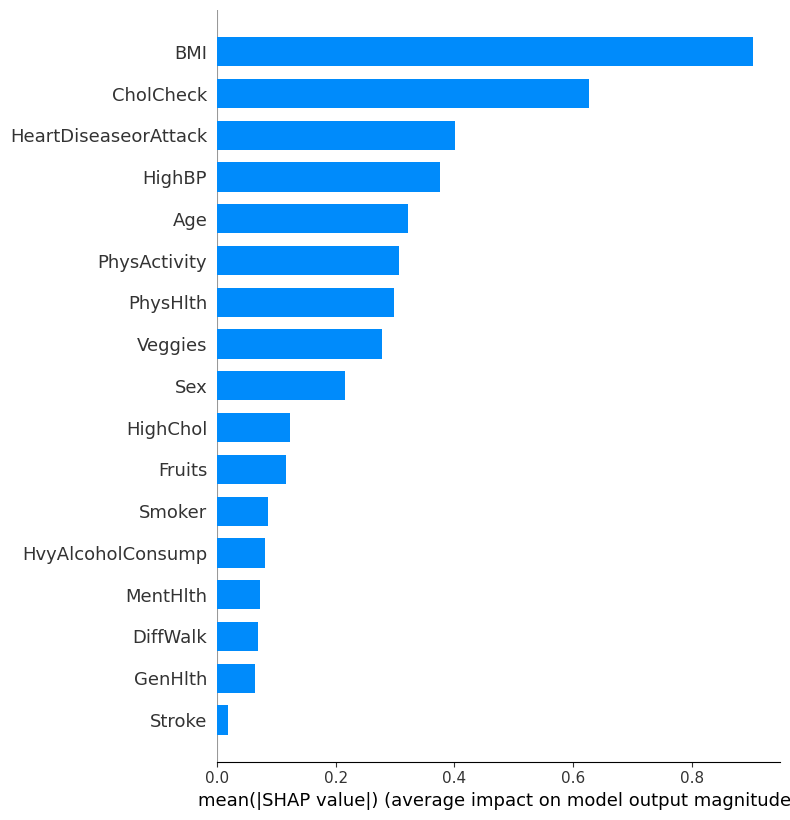

In [22]:
shap.summary_plot(shap_values, X, plot_type="bar")

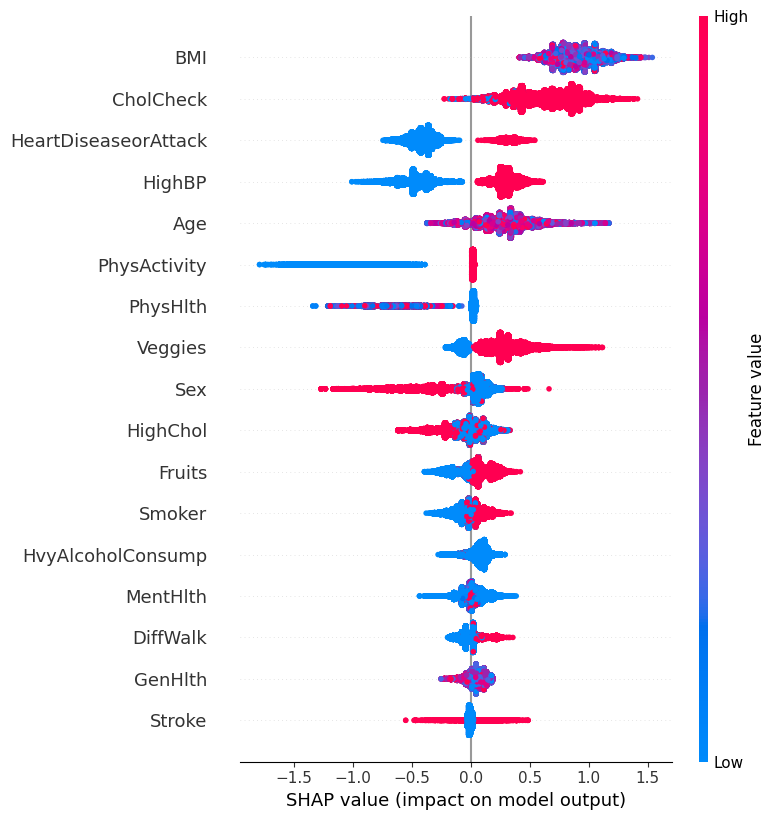

In [23]:
shap.summary_plot(shap_values, X)

Con los aportes globales podemos ver que BMI es la feature con mayor aporte a diabetes positivo, pero para cada instancia siempre es positivo independiente de su valor, por lo que no es realmente informativo. Esto resulta bastante revelador considerando que el aporte de BMI era mayor que las demás features en las instancias vistas anterioriormente ¿Podrá ser que aporta un "valor base", similar a un intercepto en una regresión lineal, o puede tomarse como un proporcional a la posibilidad? Falta indagar más.  

No es el caso para HearthDiseaseAttack, HighBP, Fruits, Smoker, etc. En todos estas features, si los valores son bajos (0 en caso de ser binario) los shap-values son negativos, y viceversa, sin son altos (1 para binario) los shap-values resultan positivos, lo que puede resultar definitorio en la posibilidad de diabetes.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [24]:
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]
feature_importance_names

Index(['BMI', 'CholCheck', 'HeartDiseaseorAttack', 'HighBP', 'Age',
       'PhysActivity', 'PhysHlth', 'Veggies', 'Sex', 'HighChol', 'Fruits',
       'Smoker', 'HvyAlcoholConsump', 'MentHlth', 'DiffWalk', 'GenHlth',
       'Stroke'],
      dtype='object')

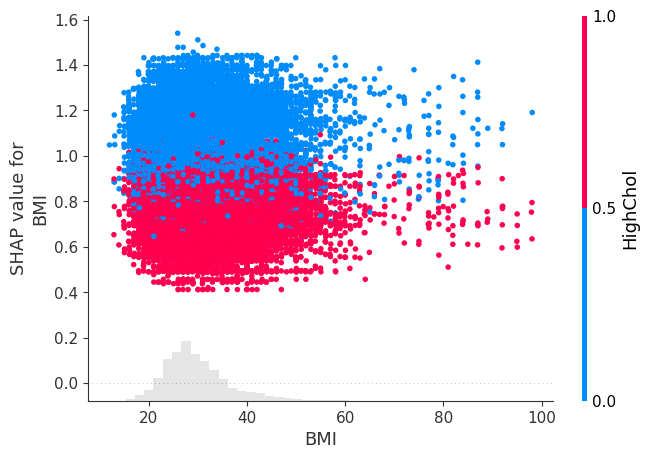

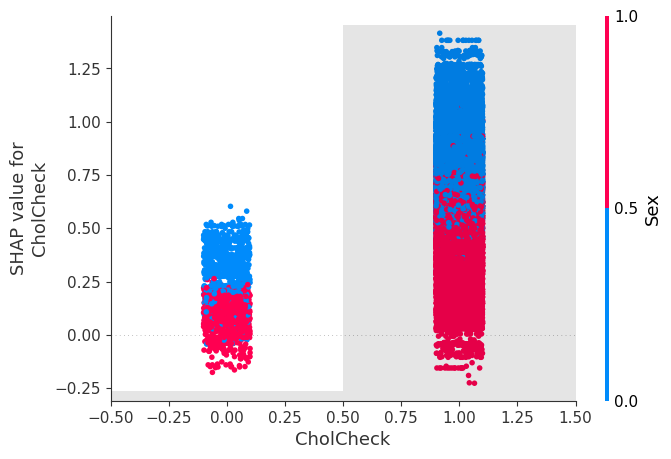

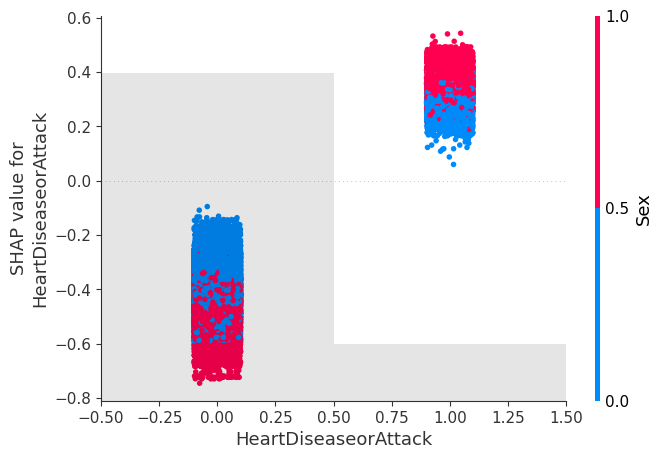

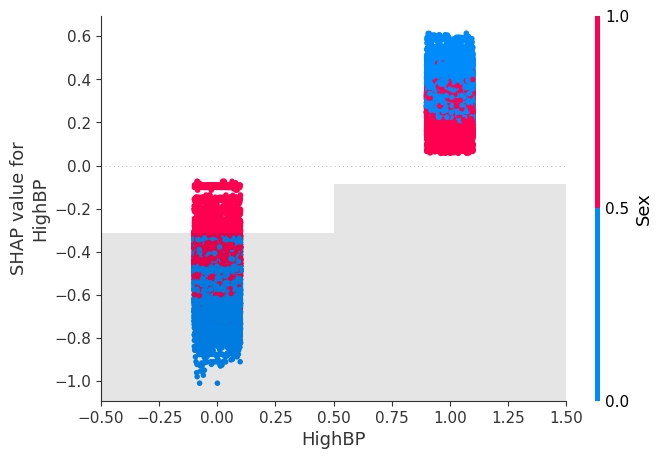

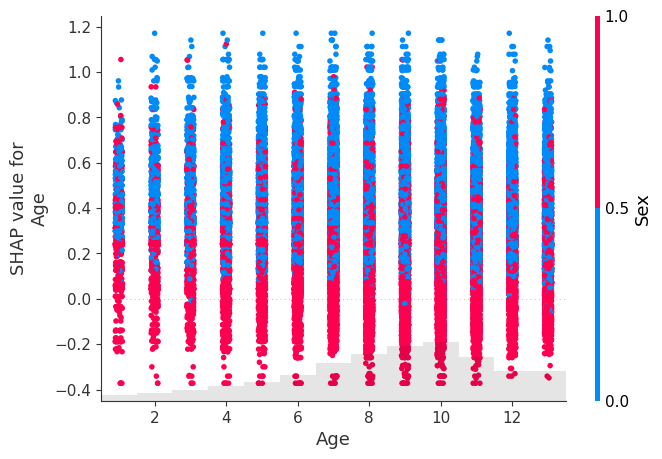

In [25]:
for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name],
                       color = shap_values)

Reiterando lo argumentado en los plots globales, tal parece que las variables que más aportan a la posibilidad de diabetes en el paciente, y que al mismo tiempo tiene relación directa su rango de valores con la positividad o negatividad del resultado son HearthDesieseAttack y HighBP.Para el caso de Cholcheck sigue siendo ambiguo, aún así en combinación con un sexo en particular se puede ver un mayor aporte (positivo) a la posibilidad. Al mismo tiempo, podemos ver que para los hombres(0?) los shap-values de estos features son más altos que para las mujeres(1?).

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

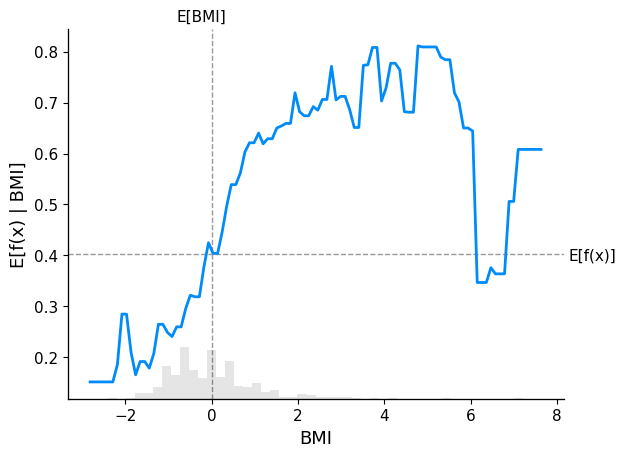

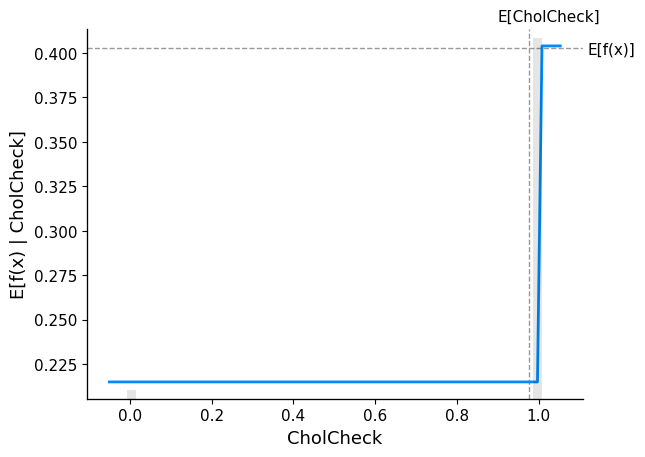

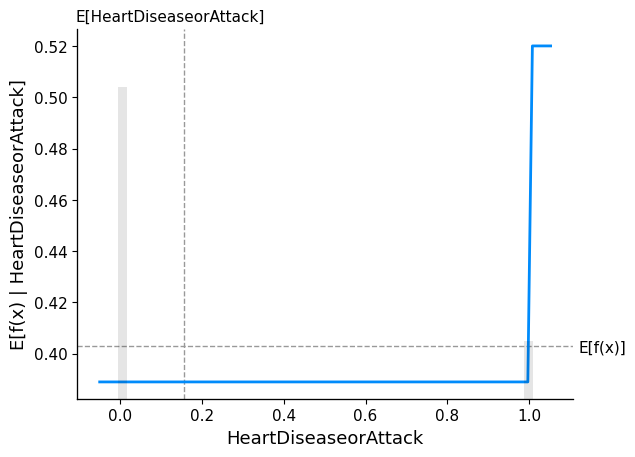

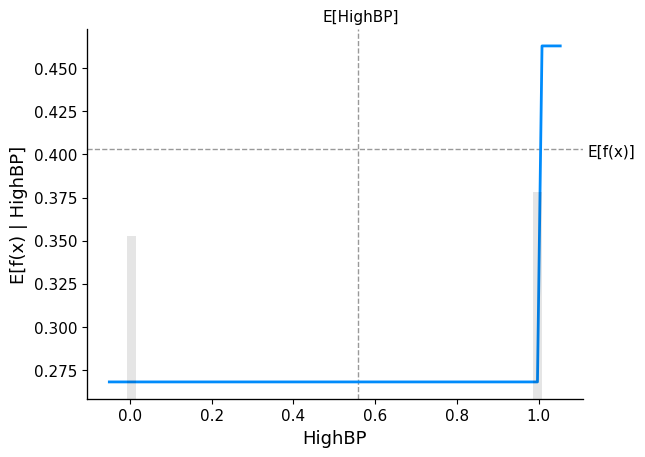

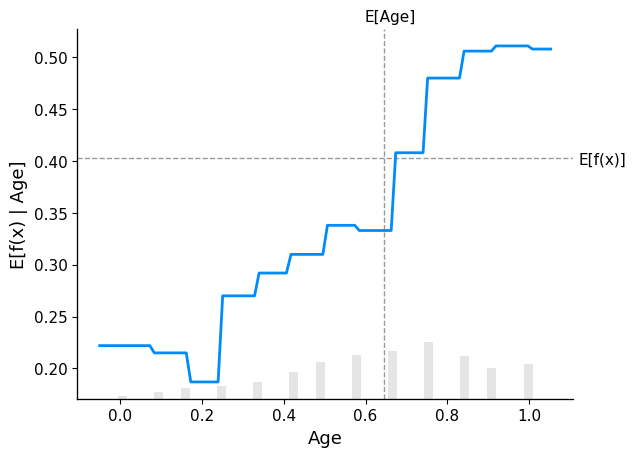

In [26]:
# Inserte código para generar gráficos PDP aquí
X1000 = shap.utils.sample(X, 1000)
X1000 = col_transf.fit_transform(X1000)
sample_ind = 20
for name in feature_importance_names[:5]:
  shap.partial_dependence_plot(
      name, xgb_step.predict, X1000, model_expected_value=True,
      feature_expected_value=True, ice=False,
      # shap_values=shap_values[sample_ind:sample_ind+1,:],
  )

Aquí se aplican las transformaciones para las distintas variables, la interpretación es ligeramente distinta.

Se sigue cumpliendo lo expuesto anteriormente para las features HearthDiseaseAttack y HighBP. Por otra parte, resulta interesante ver que pasa para BMI y Age, al parecer los aumentos de estos dos van de la mano con un aumento en sus shap-values. Aún así estos gráficos asumen una nula correlación, de ser interpretados como tal, por lo tanto, no son del todo concluyentes. El aumento de la edad por ejemplo va acompañada de una mayor posibilidad de contraer enfermedades, pero a pesar de estar altamente correlacionadas con la edad, esta por si sola no es suficientemente informativa. De igual forma un BMI alto habla de una persona con hábitos tipicamente poco saludables, pero luego esto puede guardar una alta correlación con enfermedades e indicadores más concretos que nos podrían entregar mayor información.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [27]:
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [28]:
from alibi.explainers import AnchorTabular

In [29]:
AnchXtrain = col_transf.fit_transform(X_train).to_numpy()
AnchXtest = col_transf.fit_transform(X_test).to_numpy()

In [30]:
explainer = AnchorTabular(xgb_step.predict, xgb_step.feature_names_in_, seed=1) # instanciamos Anchor usando función creada
explainer.fit(AnchXtrain)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [31]:
idx = 1000
obs = np.array(AnchXtest[idx,:], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )
print('idx: ', idx)
print('Prediction: ', explainer.predictor(AnchXtest[idx,:].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

idx = 3001
obs = np.array(AnchXtest[idx,:], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )
print('----------------------------------------------------')
print('idx: ', idx)
print('Prediction: ', explainer.predictor(AnchXtest[idx,:].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

idx = 5751
obs = np.array(AnchXtest[idx,:], ndmin = 2) # array de la obs

# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )
print('----------------------------------------------------')
print('idx: ', idx)
print('Prediction: ', explainer.predictor(AnchXtest[idx,:].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

idx:  1000
Prediction:  0
Anchor: BMI <= -0.12 AND HighChol <= 0.00 AND Age <= 0.67 AND GenHlth <= 0.15 AND DiffWalk <= 0.00 AND Sex <= 0.00
Precision: 0.96
Coverage: 0.09
----------------------------------------------------
idx:  3001
Prediction:  0
Anchor: HighBP <= 0.00 AND HighChol <= 0.00 AND GenHlth <= 0.15 AND BMI <= 0.45 AND Sex <= 0.00 AND PhysActivity > 0.00
Precision: 0.96
Coverage: 0.11
----------------------------------------------------
idx:  5751
Prediction:  0
Anchor: HighBP <= 0.00 AND GenHlth <= 0.15 AND Age <= 0.67 AND BMI <= 0.45 AND Fruits > 0.00 AND DiffWalk <= 0.00 AND Stroke <= 0.00
Precision: 0.96
Coverage: 0.14


Si partimos analizando las condiciones para las variables BMI y Age, es fácil notar que no tiene sentido una condición del tipo "Age<=0.67" o "BMI<=-0.12" (Body Mass Index). Esto se debe a las transformaciones aplicadas a estas variables pues, se modificó el rango de valores que podían tomar para mejorar el rendimiento de los algoritmos. Para esplicar de forma más intuitiva a un cliente, basta escalar "a la inversa los valores encontrados para estas features. Notamos que Age en estos 3 casos de diabetes negativa, define una edad en particular, lo que no resulta muy informativo, igualmente BMI. Para estas dos features ya observamos que no son definitorias para la posibilidad, solo son proporcionales.

Las variables binarias están relacionadas con "métricas" que podrían definir a una persona con un estilo de vida saludable. Si nos centramos en las reglas del id=5751, el cual tiene mayor coverage, nuevamente nos encontramos con lo observado anteriormente, por ejemplo, con Fruit Positivo, con HighBP Negativo, con DiffWalk negativo (que apesar de tener un aporte leve en sus shap-values, podía ser definitoria su definición, es decir, si es positivo o negativo; alto o bajo).

En particular las features con los mayores shap-values y que, al mismo tiempo, son definitorios sus valores a la posibilidad de diabetes, se repiten en las reglas encontradas para estas instancias:
- HighBP
- HighChol
- PhysActivity
- Fruits
- Smoker
- DiffWalk

Ordenados por la magnitud de sus shap-values.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

Consideramos que el método Sharp es el que permite concluir de mejor manera, pues los sharp-values y su fácil entendimiento son superiores a los otros métodos de interpretabilidad, sumado esto a que no solo se limita a una interpretación de valores particulares, sino que también nos entraga una visión global del comportamiento de las features en la predicción. Para el caso de BMI o de Age, si no supiesemos a priori su definición en el fenómeno, podríamos concluir que visto reiteradas veces su gran aporte en los valores shap es sufciente para definirlas como variables suficientes para predecir diabetes, pero si obeservamos luego sus valores globales entendemos que no definen del todo el fenómeno, o estan altamente correlacionadas con features más informativas. Todo este estudio lo permiten los shap-values.

Dado que esperamos diagnosticar diabetes, lo que se busca es realizar una predicción para una persona en particular, por lo que lo ideal es utilizar métodos locales, lo cual coincide con la elección del método Sharp.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>